## Examples

In [16]:

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform
from scipy.stats import binom

<img src='imgs/q141.jpg' style=''>
<img src='imgs/q142.jpg' style=''>

In [115]:

def funcao_densidadeConjunta(X, Y):
    XY = np.array([])
    for x, y in zip(X,Y):
        if(verificaDentroPoligono_D(x,y) == False):
            XY = np.append(XY,0)
        else:
            f = 0.1*(2 + np.sin(2*np.pi*x) + np.sin(2*np.pi*y))
            XY = np.append(XY,f)
    return XY

def g():
    return (1/9)

In [105]:

# o poligno pode ser visualizado no problema acima
# verifica se o ponto (x,y) está dentro do poligno para o cálculo de fxy(x,y), conforme apresentado pelo problema
def verificaDentroPoligono_D(x,y):
    if((x >= 1 and x <=2) and (y <= 3 and y >=0)):
        return True
    if(x >= 2 and y >= (x-1) and y <= (5-x)):
        return True
    if(x <= 1 and y >= (-x+2) and y <= (x+2)):
        return True
    return False

In [119]:

# Encontrando M, para: 1 = fxy(x,y)/Mg(x,y) => M = fxy(x,y)/g(x,y), pegando o maior valor de M
# para garantir que g(x,y) >= fxy(x,y), para qualquer x,y

X = uniform.rvs(size=1000, loc=0,scale=3)
Y = uniform.rvs(size=1000, loc=0,scale=3)

M = max(funcao_densidadeConjunta(X,Y)/g())

print('M: {0:3f}'.format(M))

M: 3.588232


In [125]:

M = 3.6 # arredondando M

tamanhoAmostra = 300 # gerando 300 instancias com densidade conjunta fxy(x,y)

amostraXY = [[],[]]

# Metódo aceitação-rejeição
aceitos = 0
while(aceitos <= tamanhoAmostra):
    X = uniform.rvs(size=1, loc=0, scale=3) # gerando X
    Y = uniform.rvs(size=1, loc=0, scale=3) # gerando Y
    razao = funcao_densidadeConjunta(X,Y)/(M/9) # M/9 = M*g() #calculando a razao >=0 <=1, para fxy(x,y)/Mg(x,y)
    #aceita = binom(1,razao).rvs(size=1)
    prob = uniform.rvs(size=1) # inserindo aleatóriedade
    if(prob < razao): # verifica se prob está no intervalo calculado em razao
        amostraXY[0].append(*X)
        amostraXY[1].append(*Y)
        aceitos += 1



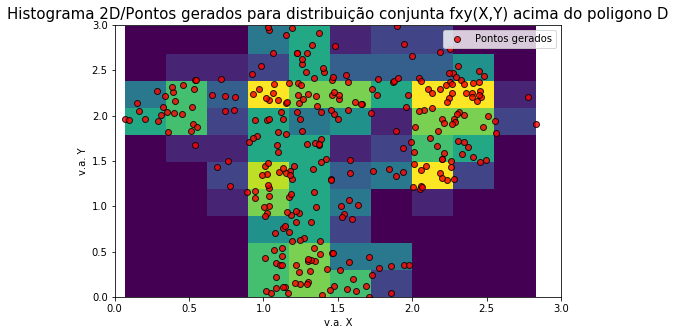

In [126]:

# Platagem amostra gerada

fig, axe = plt.subplots(figsize=(8,5))
axe.hist2d(amostraXY[0], amostraXY[1])
axe.scatter(amostraXY[0], amostraXY[1], color='red', edgecolor='black', alpha=0.8, label='Pontos gerados')
axe.set_xticks(np.arange(0,3.5,0.5))
axe.set_yticks(np.arange(0,3.5,0.5))
axe.set_title('Histograma 2D/Pontos gerados para distribuição conjunta fxy(X,Y) acima do poligono D', size=15)
axe.set_xlabel('v.a. X')
axe.set_ylabel('v.a. Y')
axe.legend()

plt.show()


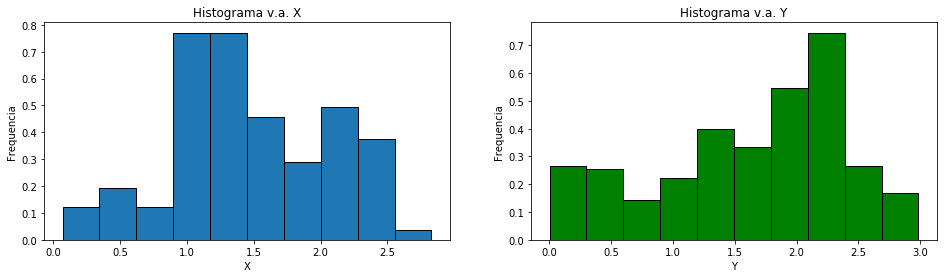

In [130]:

# Distribuição das v.a. X, Y

fig, (axe1,axe2) = plt.subplots(1,2, figsize=(16,4))

axe1.hist(amostraXY[0], edgecolor='black', density=True)
axe1.set_xlabel('X')
axe1.set_ylabel('Frequencia')
axe1.set_title('Histograma v.a. X')

axe2.hist(amostraXY[1], edgecolor='black', color='green', density=True)
axe2.set_xlabel('Y')
axe2.set_ylabel('Frequencia')
axe2.set_title('Histograma v.a. Y')

plt.show()


## References

[1]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[4]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf
cap: Vetores aleatórias
<br>